In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'upload_date': '2014-09-29T03:28:38',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'status': 'active',
 'processing_date': '2018-10-03 21:23:30',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [5]:
type(mnist.data)

numpy.ndarray

In [6]:
X, y = mnist.data, mnist.target
print('X\'s shape: ' + str(X.shape))
print('y\'s shape: ' + str(y.shape)) 

X's shape: (70000, 784)
y's shape: (70000,)


5


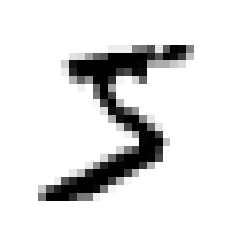

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show

print(y[0])

In [8]:
import numpy as np
y = y.astype(np.uint8)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a Binary Classifier

A binary classifier is a classifier where you only have two output.
It is either True or False

We converted the y train and test set to binary solution.
Where y is True when 5 used to be the solution

In [10]:
y_train_5 = (y_train == 5) # Returns an array where True will be inserted where there was 5 and False for the rest
y_test_5 = (y_test == 5)

In [11]:
y_train_5[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

The score method returns the mean accuracy of the model.
The mean accuracy is 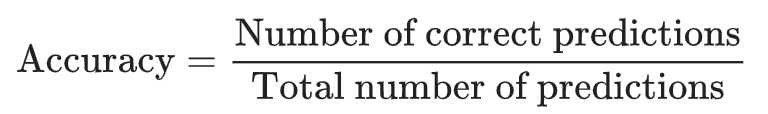

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
sgd_clf.score(X_train, y_train_5)


0.9522666666666667

## Performace Measures

#### Cross-Validation

In [16]:
from sklearn.model_selection import StratifiedKFold

from sklearn.base import clone
# clone creates a deep copy (a deep copy is a copy of an object after duplication) of the model (here the classifier)
# https://stackoverflow.com/questions/184710/what-is-the-difference-between-a-deep-copy-and-a-shallow-copy


# The kFold Split the data in a n number of folds(groups) for us to get a better or more averaged result for 
# the classifier.
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    clone_clf.n_jobs = 3
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [17]:
print(clone_clf)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=3, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [18]:
from sklearn.model_selection import cross_val_score

# cv represents the number of folds.
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [19]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
print(never_5_clf)
print('###')

cross_val_score(never_5_clf, X=X_train, y=y_train_5,  cv=3, scoring='accuracy')

Never5Classifier()
###


array([0.91125, 0.90855, 0.90915])

## Confusion Matrix

There is a good explanation on this video: https://www.youtube.com/watch?v=Kdsp6soqA7o&t=319s

In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=3)
y_train_pred[:10]

array([ True, False, False, False, False, False, False, False, False,
       False])

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])